In [53]:
import pandas as pd
import numpy as np
import requests
try:
    import urllib2
except ImportError:
    import urllib
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib
#import seaborn as sns; sns.set()
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
%matplotlib inline

##### Import data on energy consumption and the PLUTO Data

In [2]:
#make PUIDATA an environment variable
os.environ["PUIDATA"] = "%s/PUIData"%os.getenv("HOME")

In [3]:
#change working directory to PUIDATA
os.chdir(os.getenv("PUIDATA"))
os.getcwd()

'/nfshome/mrn291/PUIData'

In [4]:
nrg_url = 'https://data.cityofnewyork.us/resource/m46j-75iy.csv?$limit=50000'
energy = pd.read_csv(nrg_url)
energy.head()

,automatic_water_benchmarking_eligible,bbls_co_reported,bin,borough,census_tract,co_reported_bbl_status,community_board,community_council,direct_ghg_emissions_mtco2e,dof_benchmarking_submission_status,...,reported_property_floor_area_building_s_ft,reported_water_method,site_eui_kbtu_ft2,source_eui_kbtu_ft2,street_name,street_number,total_ghg_emissions_mtco2e,weather_normalized_site_eui_kbtu_ft2,weather_normalized_source_eui_kbtu_ft2,zip_code
0,NaN,1000410001,NaN,Manhattan,NaN,NaN,NaN,NaN,NaN,BBL not valid,...,918919,NaN,NaN,NaN,NaN,NaN,NaN,Not Available,Not Available,NaN
1,Yes,NaN,NaN,Queens,NaN,NaN,NaN,NaN,NaN,No Submission Matched to BBL,...,NaN,None,NaN,NaN,108 STREET,63-10,NaN,NaN,NaN,11375.0
2,NaN,2027620097,NaN,Bronx,NaN,NaN,NaN,NaN,NaN,BBL not valid,...,64200,NaN,NaN,NaN,NaN,NaN,NaN,Not Available,Not Available,NaN
3,No,NaN,1012266.0,Manhattan,99.0,NaN,4.0,3.0,NaN,No Submission Matched to BBL,...,NaN,None,NaN,NaN,11 AVENUE,201,NaN,NaN,NaN,10001.0
4,NaN,2048300034,NaN,Bronx,NaN,NaN,NaN,NaN,NaN,Not on Covered Buildings List,...,50000,None,NaN,NaN,NaN,NaN,NaN,Not Available,Not Available,NaN


In [5]:
mn_pluto_url = 'https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/mn_mappluto_18v1.zip'
if os.path.isfile(os.getenv("PUIDATA") + "/mn_mappluto_18v1.zip"):
    print("Data already there!")
else:
    os.system("curl -O " + mn_pluto_url)
    os.system("unzip " + os.getenv("PUIDATA") + "/mn_mappluto_18v1.zip")

Data already there!


In [6]:
building_size = gpd.GeoDataFrame.from_file(os.getenv("PUIDATA") + "/MNMapPLUTO.shp")
building_size.head()

,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,APPBBL,APPDate,PLUTOMapID,FIRM07_FLA,PFIRM15_FL,Version,MAPPLUTO_F,SHAPE_area,SHAPE_len,geometry
0,MN,1545,52,108,138,4000,02,5,10028,E022,...,0.000000e+00,None,1,None,None,18V1,0,2867.154705,260.428942,"POLYGON ((997277.2344360352 221816.0936279297,..."
1,MN,723,7501,104,93,6000,02,3,10001,E003,...,1.007230e+09,11/30/2006,1,None,None,18V1,7,10907.639931,417.764545,"POLYGON ((984164.5626220703 211846.0704345703,..."
2,MN,1680,48,111,170,5000,04,8,10029,E091,...,0.000000e+00,None,1,1,1,18V1,0,2665.033424,256.893308,"POLYGON ((1000742.195800781 227910.6640014648,..."
3,MN,1385,32,108,130,2003,02,4,10021,E039,...,0.000000e+00,None,1,None,None,18V1,0,15302.920914,505.033271,"POLYGON ((994007.6885986328 219880.4284057617,..."
4,MN,1197,27,107,169,5000,03,6,10024,E074,...,0.000000e+00,None,1,None,None,18V1,0,4374.612456,295.652483,"POLYGON ((992273.6849975586 224863.4904174805,..."


##### Explore the data with a scatter matrix

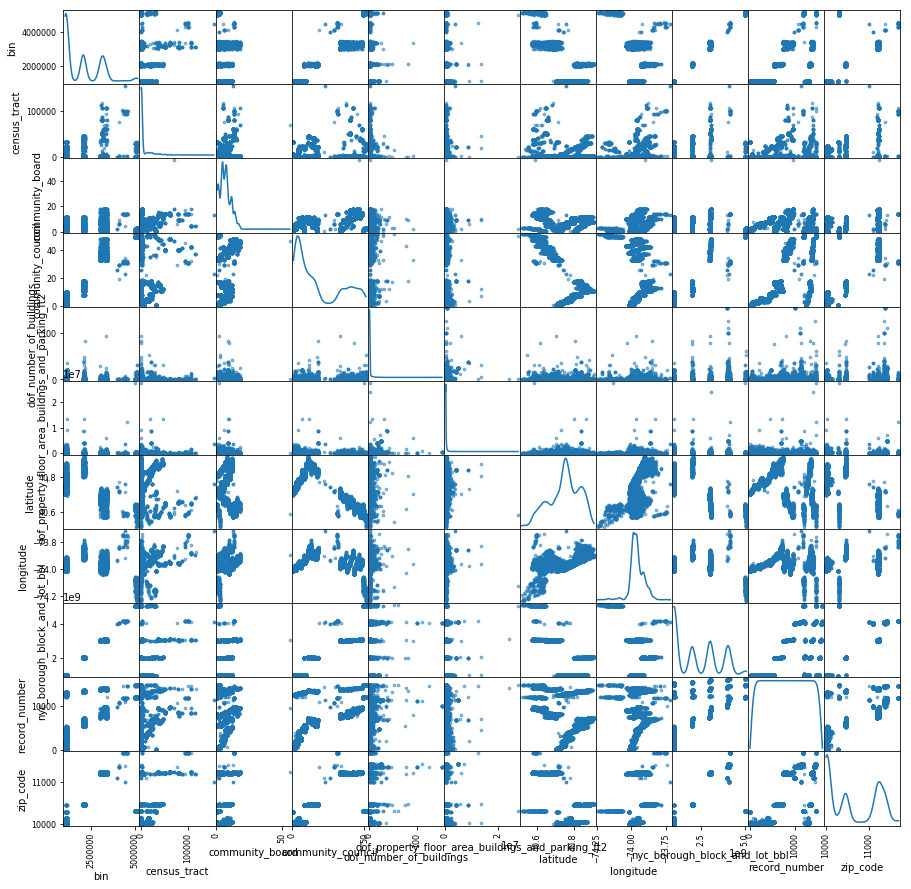

In [7]:
pd.scatter_matrix(energy, s=30, figsize=(15, 15), diagonal='kde')
plt.show()

Figure showing a scatter matrix of the variables in the City's Energy and Water Data dataset.  Mostly this figure shows that most of the features of interest are incorrectly typed and need revision.  

In [8]:
#fix up the dataframes to be the features of interest and correctly data typed
energy.dtypes.sort_values()

record_number                                                   int64
longitude                                                     float64
nyc_borough_block_and_lot_bbl                                 float64
latitude                                                      float64
dof_property_floor_area_buildngs_and_parking_ft2              float64
dof_number_of_buildings                                       float64
community_council                                             float64
zip_code                                                      float64
census_tract                                                  float64
bin                                                           float64
community_board                                               float64
direct_ghg_emissions_mtco2e                                    object
weather_normalized_site_eui_kbtu_ft2                           object
total_ghg_emissions_mtco2e                                     object
street_number       

In [9]:
energy_cols = ['nyc_borough_block_and_lot_bbl','site_eui_kbtu_ft2','reported_property_floor_area_building_s_ft']
energy = energy[energy_cols]
energy.rename(columns={'nyc_borough_block_and_lot_bbl':'BBL'}, inplace=True)
object_cols = energy.columns[energy.dtypes.eq('object')]
energy[object_cols] = energy[object_cols].apply(pd.to_numeric, errors='coerce')

In [10]:
energy.dtypes

BBL                                           float64
site_eui_kbtu_ft2                             float64
reported_property_floor_area_building_s_ft    float64
dtype: object

In [11]:
energy.head()

,BBL,site_eui_kbtu_ft2,reported_property_floor_area_building_s_ft
0,1.000410e+09,NaN,918919.0
1,4.021460e+09,NaN,NaN
2,2.027620e+09,NaN,64200.0
3,1.006700e+09,NaN,NaN
4,2.048300e+09,NaN,50000.0


In [12]:
building_size.dtypes.sort_values()

OfficeArea     int64
BoroCode       int64
OtherArea      int64
CondoNo        int64
NumBldgs       int64
XCoord         int64
YCoord         int64
Easements      int64
UnitsRes       int64
UnitsTotal     int64
ResArea        int64
GarageArea     int64
RetailArea     int64
LotArea        int64
YearAlter2     int64
YearAlter1     int64
HealthArea     int64
HealthCent     int64
PolicePrct     int64
YearBuilt      int64
ZipCode        int64
Council        int64
BldgArea       int64
MAPPLUTO_F     int64
ComArea        int64
CD             int64
Lot            int64
Block          int64
FactryArea     int64
StrgeArea      int64
               ...  
LotType       object
CT2010        object
CB2010        object
SchoolDist    object
FireComp      object
SanitBoro     object
SanitDistr    object
SanitSub      object
Address       object
ZoneDist1     object
ZoneDist2     object
ZoneDist3     object
ZoneDist4     object
Overlay1      object
Overlay2      object
SPDist1       object
SPDist2      

In [13]:
building_cols = ['BBL','UnitsTotal','UnitsRes','YearBuilt','geometry']
building_size = building_size[building_cols]

In [14]:
building_size.head()

,BBL,UnitsTotal,UnitsRes,YearBuilt,geometry
0,1.015450e+09,18,16,1920,"POLYGON ((997277.2344360352 221816.0936279297,..."
1,1.007238e+09,50,50,1914,"POLYGON ((984164.5626220703 211846.0704345703,..."
2,1.016800e+09,10,10,1910,"POLYGON ((1000742.195800781 227910.6640014648,..."
3,1.013850e+09,32,29,1928,"POLYGON ((994007.6885986328 219880.4284057617,..."
4,1.011970e+09,26,26,1900,"POLYGON ((992273.6849975586 224863.4904174805,..."


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe7bca41390>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fe7bcc455c0>]], dtype=object)

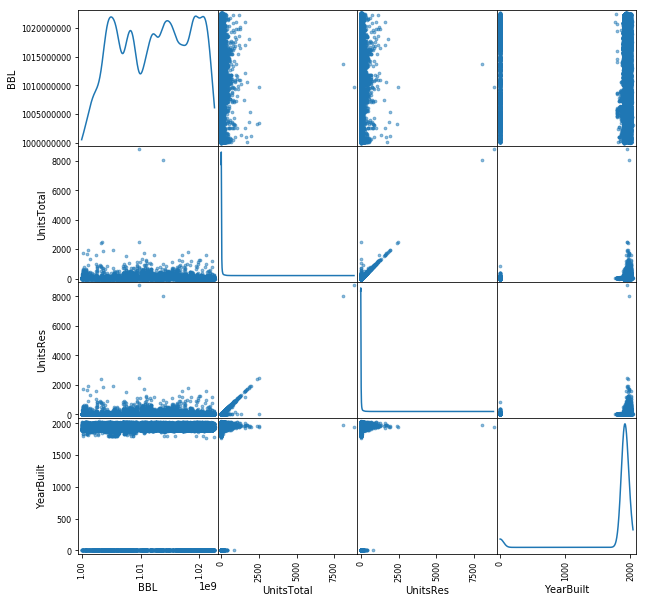

In [15]:
pd.scatter_matrix(building_size, s=30, figsize=(10, 10), diagonal='kde')

Figure showing that there are zeros in my Year Built data that need to be handled.

In [16]:
#fix those year built zeros
building_size.groupby('YearBuilt').count()
building_size['YearBuilt'] = building_size['YearBuilt'].replace(0, np.NaN)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe7bcc518d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fe7bcf2e978>]], dtype=object)

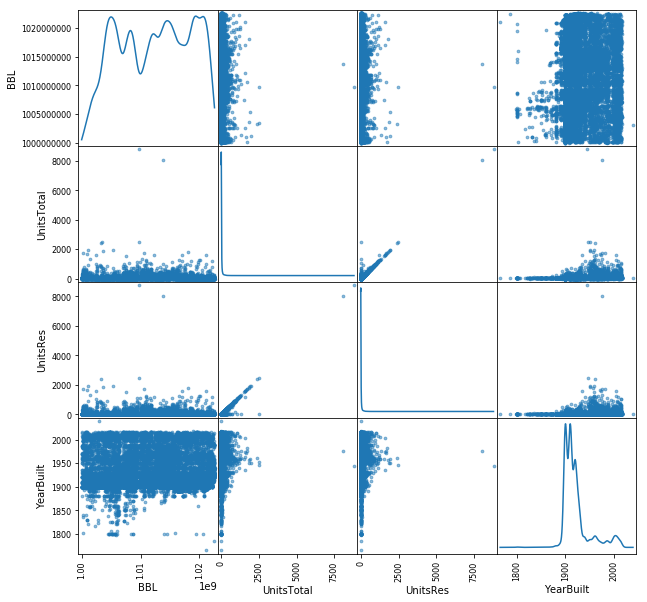

In [17]:
#call scatter again
pd.scatter_matrix(building_size, s=30, figsize=(10, 10), diagonal='kde')

Figure showing a scatter matrix of the features from the building size data set.  Clear unsuprising linear relationship between the total number of units in a building and the total number of residential units in a building.  Additionally, there looks to be a correlation betwen the number of units in a building (both total and residential) and the year the building was built, such that more modern buildings have more units, which isn't surprising given advances in construction technology.

##### Check columns for spurious entries and correct datatypes

In [18]:
print("Number of missing energy observations:", np.isnan(energy.site_eui_kbtu_ft2).astype(float).sum())

Number of missing energy observations: 4623.0


In [19]:
print("Fraction of missing energy observations: %.2f"%(np.isnan(energy.site_eui_kbtu_ft2).astype(float).sum() / len(energy.site_eui_kbtu_ft2)))

Fraction of missing energy observations: 0.29


#### Merge the two datasets using BBL

In [20]:
energy.head()

,BBL,site_eui_kbtu_ft2,reported_property_floor_area_building_s_ft
0,1.000410e+09,NaN,918919.0
1,4.021460e+09,NaN,NaN
2,2.027620e+09,NaN,64200.0
3,1.006700e+09,NaN,NaN
4,2.048300e+09,NaN,50000.0


In [21]:
building_size.head()

,BBL,UnitsTotal,UnitsRes,YearBuilt,geometry
0,1.015450e+09,18,16,1920.0,"POLYGON ((997277.2344360352 221816.0936279297,..."
1,1.007238e+09,50,50,1914.0,"POLYGON ((984164.5626220703 211846.0704345703,..."
2,1.016800e+09,10,10,1910.0,"POLYGON ((1000742.195800781 227910.6640014648,..."
3,1.013850e+09,32,29,1928.0,"POLYGON ((994007.6885986328 219880.4284057617,..."
4,1.011970e+09,26,26,1900.0,"POLYGON ((992273.6849975586 224863.4904174805,..."


In [22]:
building_energy = pd.merge(building_size, energy, on='BBL')

In [23]:
building_energy.head()

,BBL,UnitsTotal,UnitsRes,YearBuilt,geometry,site_eui_kbtu_ft2,reported_property_floor_area_building_s_ft
0,1.007238e+09,50,50,1914.0,"POLYGON ((984164.5626220703 211846.0704345703,...",68.7,95844.0
1,1.013850e+09,32,29,1928.0,"POLYGON ((994007.6885986328 219880.4284057617,...",87.4,206989.0
2,1.021740e+09,72,72,1923.0,"POLYGON ((1004080.155029297 252930.9956054688,...",140.4,52920.0
3,1.008830e+09,108,107,1931.0,"POLYGON ((989337.639831543 209686.7838134766, ...",96.5,98359.0
4,1.008570e+09,138,134,1910.0,"POLYGON ((988035.3540039062 210290.9854125977,...",36.4,154000.0


In [24]:
#drop rows where building energy or reported floor size is NaN 
building_energy.dropna(axis=0, subset=['site_eui_kbtu_ft2', 'reported_property_floor_area_building_s_ft'], inplace=True)

#drop rows where building energy or reported floor size is zero
building_energy = building_energy[(building_energy.site_eui_kbtu_ft2 !=0) &\
                                  (building_energy.reported_property_floor_area_building_s_ft !=0)]

In [25]:
building_energy['logunits'] = np.log(building_energy.UnitsTotal + 1)
building_energy['logenergy'] = np.log(building_energy.site_eui_kbtu_ft2 + 1)

#### Plot the data as a choropleth for the 2 quantities of interest: number of units and energy consumption.

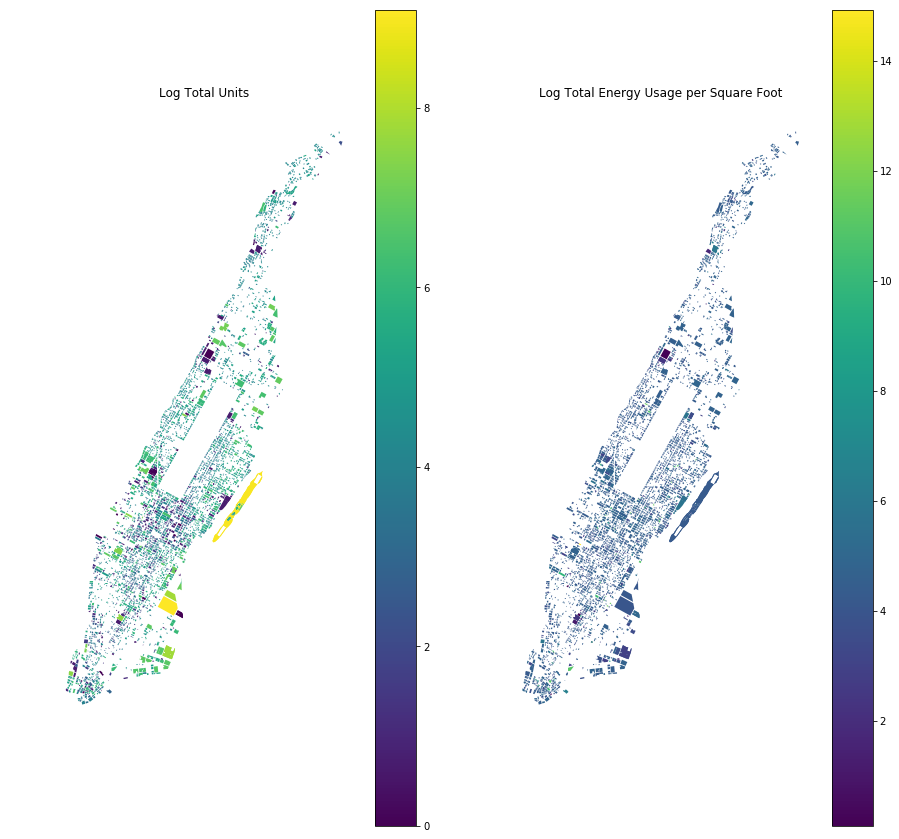

In [26]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,15))
ax1 = plt.subplot(121)
ax1.set_aspect('equal')
ax1.axis('off')
plt.title("Log Total Units")
building_energy.plot(ax=ax1, cmap='viridis', column='logunits', edgecolor=None, lw=0.2, legend=True)

ax2 = plt.subplot(122)
ax2.set_aspect('equal')
ax2.axis('off')
plt.title("Log Total Energy Usage per Square Foot")
building_energy.plot(ax=ax2, cmap='viridis', column='logenergy', edgecolor=None, lw=0.2, legend=True)

plt.show()


Figure showing the log total units in a building by BBL next to the log total energy usage per square foot by BBL.  Roosevelt Island and Stuyvesant Town stick out as BBLs with extremely high numbers of units.

#### Feature Engineering and the Magic of Log Scales

In [27]:
building_energy['total_energy'] = building_energy.reported_property_floor_area_building_s_ft.astype(float) * \
    building_energy.site_eui_kbtu_ft2.astype(float)

building_energy['log_total_energy'] = np.log(building_energy.total_energy + 1)

#also make it a non-geo frame so you can make scatter plots in pandas
building_energy = pd.DataFrame(building_energy)

In [28]:
print("Minimum building energy value: %f"%(building_energy.total_energy.min()))
print("Maximum building energy value: %f"%(building_energy.total_energy.max()))

Minimum building energy value: 5344.000000
Maximum building energy value: 350145188000.000000


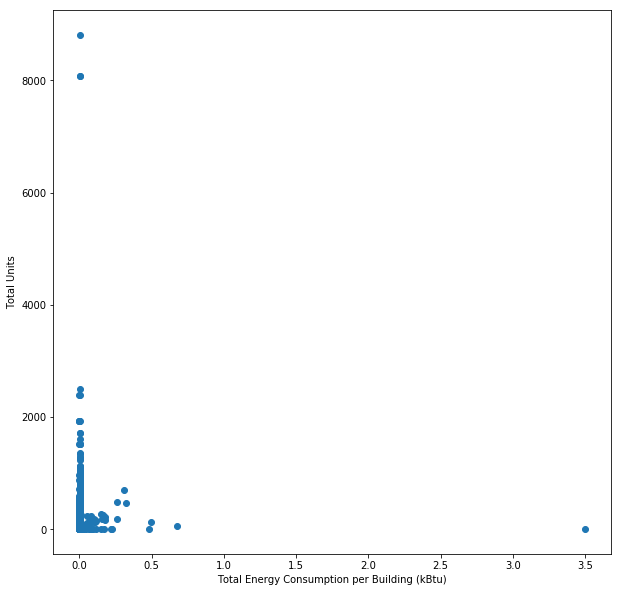

In [29]:
y = building_energy.UnitsTotal
x = building_energy.total_energy / 1e11

plt.subplots(figsize=(10, 10))
plt.scatter(x, y)

plt.xlabel("Total Energy Consumption per Building (kBtu)")
plt.ylabel("Total Units")

plt.show()

Figure showing the relationship between total units and energy used, but also makes it clear we need to zoom in from the outliers

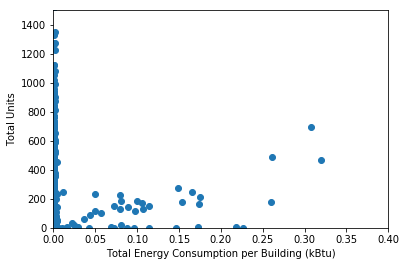

In [30]:
y = building_energy.UnitsTotal
x = building_energy.total_energy / 1e11

plt.scatter(x, y)

plt.ylim(0,1500)
plt.xlim(0,0.4)
plt.xlabel("Total Energy Consumption per Building (kBtu)")
plt.ylabel("Total Units")

plt.show()

Figure showing the relationship between the total number of units and the total energy consumption per building in kBtu.  There appears to be a positive linear correlation between the total units in a building and the totla energy consumption.

In [31]:
#cut the values to fit
building_energy = building_energy[(building_energy.total_energy > 1000) & (building_energy.total_energy < 1e10) & \
                                 (building_energy.UnitsTotal > 1) & (building_energy.UnitsTotal < 1000)]

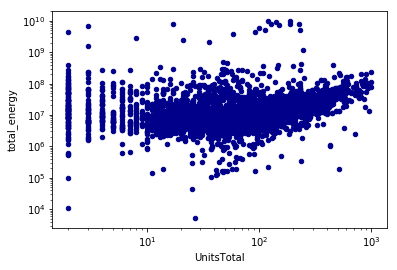

In [32]:
#plot it the right way but in log space
ax1 = building_energy.plot.scatter(x='UnitsTotal', y='total_energy', c='DarkBlue', loglog=True)

Figure showing the relationship between units in a building and the total energy use.  There appears to be a positive correlation between the number of units and the total energy used, such that as the units increase, as does the energy use.

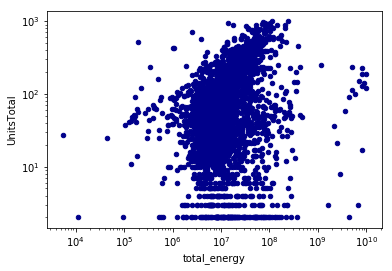

In [33]:
#plot it the wrong way but in log space
ax1 = building_energy.plot.scatter(y='UnitsTotal', x='total_energy', c='DarkBlue', loglog=True)

Figure showing the relationship between units in a building and total energy use in log space but with the independent and dependent variables switched.

#### Fit the data with a line in log space.
###### Print the summary and plot the data and the model.

In [34]:
x_range = building_energy.logunits
y_range = building_energy.log_total_energy

x_plus_constant = sm.add_constant(x_range)
fit = smf.WLS(y_range, x_plus_constant).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:       log_total_energy   R-squared:                       0.060
Model:                            WLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     296.7
Date:                Sat, 01 Dec 2018   Prob (F-statistic):           1.69e-64
Time:                        17:56:40   Log-Likelihood:                -6696.1
No. Observations:                4624   AIC:                         1.340e+04
Df Residuals:                    4622   BIC:                         1.341e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         15.2413      0.057    265.249      0.000        15.129    15.354
logunits       0.2301      0.013     17.226      0.000         0.204     0.256
==============================================================================
Omnibus:                     1322.016   Durbin-Watson:                   1.876
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12777.957
Skew:                           1.082   Prob(JB):                         0.00
Kurtosis:                      10.851   Cond. No.                         17.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

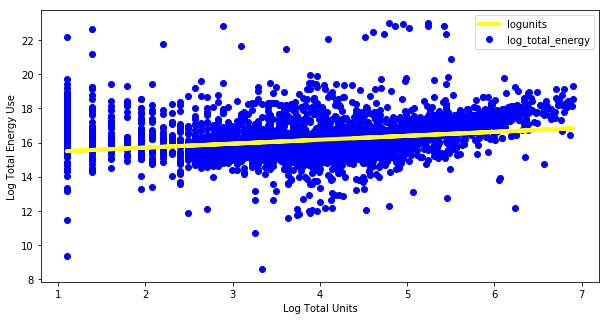

In [35]:
fit_constant, fit_slope = fit.params

plt.figure(figsize = (10,5))
plt.scatter(x_range, y_range, c='b')
plt.xlabel("Log Total Units")
plt.ylabel("Log Total Energy Use")

plt.plot(x_range, fit_constant + fit_slope * x_range, color = 'xkcd:yellow', lw=4)

plt.legend()
         
plt.show()

Figure showing the total energy use per building by total units in the building in log space, fit with a weighted least squares model (represented by the line).

#### The independent variable is total units and the dependent variable is total energy use.

However, indulge me and try both models: models (nrg vs units total & units total vs nrg).

Create the models with statsmodels <br/>
Print the model summary <br/>
Plot the data and the fit <br/>
Check and comment on how the following model diagnostics change: <br/>
  $R^2$ and LogLikelihood

In [36]:
#model with units as the independent variable and energy as the dependent variable
x1_range = building_energy.logunits
y1_range = building_energy.log_total_energy

x_plus_constant = sm.add_constant(x1_range)
fit = smf.WLS(y1_range, x_plus_constant).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:       log_total_energy   R-squared:                       0.060
Model:                            WLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     296.7
Date:                Sat, 01 Dec 2018   Prob (F-statistic):           1.69e-64
Time:                        17:57:09   Log-Likelihood:                -6696.1
No. Observations:                4624   AIC:                         1.340e+04
Df Residuals:                    4622   BIC:                         1.341e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         15.2413      0.057    265.249      0.000        15.129    15.354
logunits       0.2301      0.013     17.226      0.000         0.204     0.256
==============================================================================
Omnibus:                     1322.016   Durbin-Watson:                   1.876
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12777.957
Skew:                           1.082   Prob(JB):                         0.00
Kurtosis:                      10.851   Cond. No.                         17.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

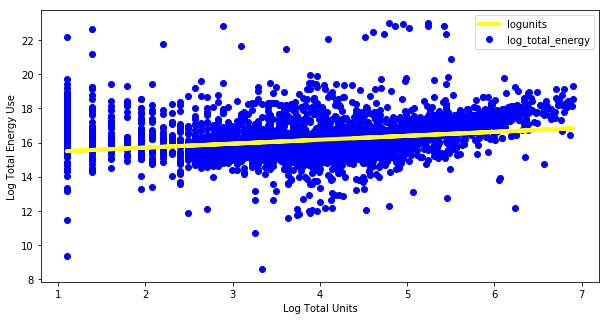

In [37]:
fit_constant, fit_slope = fit.params

plt.figure(figsize = (10,5))
plt.scatter(x_range, y_range, c='b')
plt.xlabel("Log Total Units")
plt.ylabel("Log Total Energy Use")

plt.plot(x_range, fit_constant + fit_slope * x_range, color = 'xkcd:yellow', lw=4)

plt.legend()
         
plt.show()

In [39]:
#model with units as the dependent variable and energy use as the independent variable
y1_range = building_energy.logunits
x1_range = building_energy.log_total_energy

x_plus_constant = sm.add_constant(x1_range)
fit = smf.WLS(y1_range, x_plus_constant).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:               logunits   R-squared:                       0.060
Model:                            WLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     296.7
Date:                Sat, 01 Dec 2018   Prob (F-statistic):           1.69e-64
Time:                        17:57:36   Log-Likelihood:                -6997.9
No. Observations:                4624   AIC:                         1.400e+04
Df Residuals:                    4622   BIC:                         1.401e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
const               -0.0966      0.247     -0.391      0.696        -0.581     0.388
log_total_energy     0.2622      0.015     17.226      0.000         0.232     0.292
==============================================================================
Omnibus:                      637.872   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              982.187
Skew:                          -0.977   Prob(JB):                    5.26e-214
Kurtosis:                       4.133   Cond. No.                         249.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

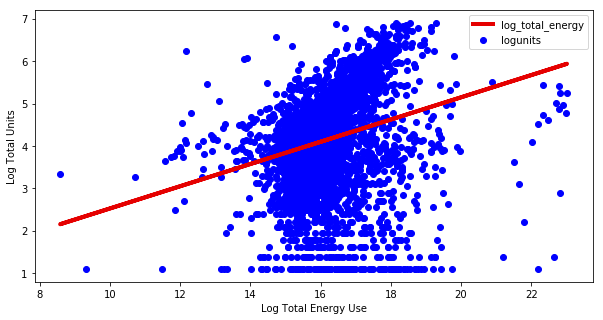

In [40]:
fit_constant, fit_slope = fit.params

plt.figure(figsize = (10,5))
plt.scatter(x1_range, y1_range, c='b')
plt.ylabel("Log Total Units")
plt.xlabel("Log Total Energy Use")

plt.plot(x1_range, fit_constant + fit_slope * x1_range, color = 'xkcd:red', lw=4)

plt.legend()
         
plt.show()

$R^2$ and adjusted-$R^2$ values are the same for both models, however the model that has energy as the dependent variable has a higher log-likelihood.

#### Second degree polynomial fit

In [41]:
building_energy.head()

,BBL,UnitsTotal,UnitsRes,YearBuilt,geometry,site_eui_kbtu_ft2,reported_property_floor_area_building_s_ft,logunits,logenergy,total_energy,log_total_energy
0,1.007238e+09,50,50,1914.0,"POLYGON ((984164.5626220703 211846.0704345703,...",68.7,95844.0,3.931826,4.244200,6584482.8,15.700226
1,1.013850e+09,32,29,1928.0,"POLYGON ((994007.6885986328 219880.4284057617,...",87.4,206989.0,3.496508,4.481872,18090838.6,16.710916
2,1.021740e+09,72,72,1923.0,"POLYGON ((1004080.155029297 252930.9956054688,...",140.4,52920.0,4.290459,4.951593,7429968.0,15.821032
3,1.008830e+09,108,107,1931.0,"POLYGON ((989337.639831543 209686.7838134766, ...",96.5,98359.0,4.691348,4.579852,9491643.5,16.065922
4,1.008570e+09,138,134,1910.0,"POLYGON ((988035.3540039062 210290.9854125977,...",36.4,154000.0,4.934474,3.621671,5605600.0,15.539277


In [42]:
model = building_energy[['logunits','log_total_energy']]
model['logunit_sq'] = np.square(model.logunits)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [43]:
second_degree_fit = smf.wls(formula="log_total_energy ~ logunit_sq + logunits", data=model).fit()

In [44]:
second_degree_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:       log_total_energy   R-squared:                       0.202
Model:                            WLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     584.5
Date:                Sat, 01 Dec 2018   Prob (F-statistic):          5.08e-227
Time:                        17:58:16   Log-Likelihood:                -6318.6
No. Observations:                4624   AIC:                         1.264e+04
Df Residuals:                    4621   BIC:                         1.266e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     18.0756      0.112    160.996      0.000        17.855    18.296
logunit_sq     0.2127      0.007     28.630      0.000         0.198     0.227
logunits      -1.4014      0.058    -24.038      0.000        -1.516    -1.287
==============================================================================
Omnibus:                     1445.166   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24558.132
Skew:                           1.040   Prob(JB):                         0.00
Kurtosis:                      14.097   Cond. No.                         189.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
second_degree_fit.params

Intercept     18.075594
logunit_sq     0.212693
logunits      -1.401428
dtype: float64

In [46]:
intercept, coef_sq, coef_x = second_degree_fit.params

In [47]:
y = intercept + coef_sq * model.logunit_sq + coef_x * model.logunits

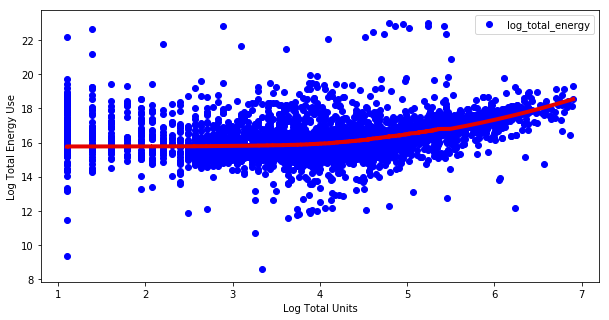

In [52]:
plt.figure(figsize = (10,5))
plt.scatter(model.logunits, model.log_total_energy, c='b')
plt.xlabel("Log Total Units")
plt.ylabel("Log Total Energy Use")

plt.plot(model.logunits.sort_values(), y.sort_values(), color = 'xkcd:red', lw=4)

plt.legend()
         
plt.show()

Figure showing the log total units versus the log total energy use of buildings in Manhattan, with a best-fit polynomial line

#### Calculate the chi square and likelihood of your model.

In [57]:
def chi2(data, model, errors = None):
    '''Calculates the chi sq given data, model and errors
    Arguments:
    data: series of datapoints (endogenous variable)
    model: series of predicted values corresponding to the observed data
    errors: series of errors (optional). 
    If errors are not passes all errors are set to 1
    Chi Squared = sum of (observed - expected)^2 / expected
    '''
    observed = data
    expected = model.predict()
    chi_sq = (np.square(observed - expected) / expected).sum()
    
    #return chi squared if no errors
    if errors == None:
        return chi_sq
    
    #return 
    if errors != None:
        chi_sq_error = (np.square(observed - expected) / np.square(errors)).sum()
        return chi_sq_error
        
    

In [58]:
chi2(building_energy.log_total_energy, second_degree_fit)

257.62868323511782